In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import cv2

In [11]:
im = np.load('123.npy')
im.shape

(480, 640)

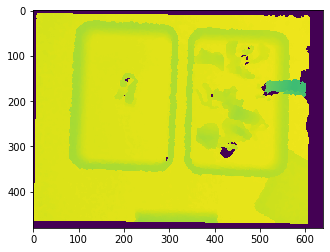

In [12]:
plt.imshow(im)

In [21]:
im_gray = ((im - im.min()) / (im.max() - im.min()) * 255).astype('uint8')

In [22]:
im_gray = cv2.medianBlur(im_gray, 7)

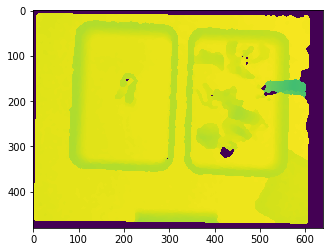

In [23]:
plt.imshow(im_gray)

In [124]:
thresh=0.05
t = thresh * 255 / (np.max(im) - np.min(im))
im_canny = cv2.Canny(im_gray, t, t*2.5)

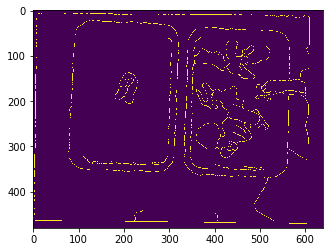

In [125]:
plt.imshow(im_canny)

In [126]:
contours, hierarchy = cv2.findContours(im_canny, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [127]:
im_contours = np.zeros_like(im_canny)
for contourIdx in range(len(contours)):
    im_contours=cv2.drawContours(im_contours, contours, contourIdx, [255,0,0])

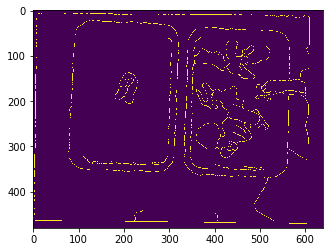

In [128]:
plt.imshow(im_contours)

In [129]:
contours[0].max(axis=0)[0,0]

408

In [130]:
area = np.array([cv2.contourArea(c) for c in contours])
max_x = np.array([c.max(axis=0)[0,0] for c in contours])
area = np.where((area > 640*480/2) | (max_x > 400), 0, area)
area_sort = np.argsort(area)[::-1]
area_sort

array([54, 55, 34, 36, 35, 10, 32,  8,  9,  7,  1, 50,  6, 19, 20, 18, 21,
       17, 22, 57, 12, 16, 15, 14, 13, 24, 11,  5,  4,  3,  2, 23, 28, 25,
       42, 53, 52, 51, 49, 48, 47, 46, 45, 44, 43, 41, 26, 40, 39, 38, 37,
       33, 31, 30, 29, 56, 27,  0])

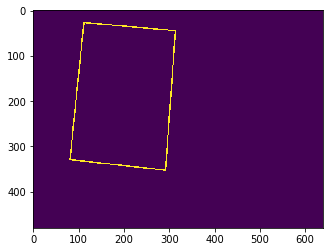

In [131]:
maxa = area_sort[0]
polyContours = [cv2.approxPolyDP(contours[maxa], 20, closed=True)]
im_contours = np.zeros_like(im_canny)
im_contours=cv2.drawContours(im_contours, polyContours, 0, 255, 2)
plt.imshow(im_contours)

array([[[314,  45]],

       [[292, 352]],

       [[ 81, 329]],

       [[112,  27]]], dtype=int32)

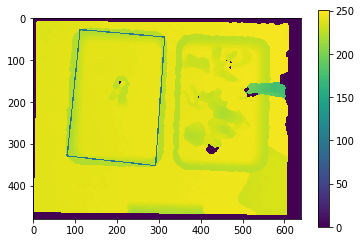

In [132]:
hull = cv2.convexHull(polyContours[0], False)
im_contours = im_gray.copy()
im_contours=cv2.drawContours(im_contours, polyContours, 0, 100, 2)
plt.imshow(im_contours)
plt.colorbar()
hull

In [134]:
def get_frame(image, thresh=0.03):
    """ 得到待抓取框的大概位置 """
    im = image
    im_gray = ((im - im.min()) / (im.max() - im.min()) * 255).astype('uint8')
    im_gray = cv2.medianBlur(im_gray, 7)
    t = thresh * 255 / (np.max(im) - np.min(im))
    im_canny = cv2.Canny(im_gray, t, t*2.5)
    contours, hierarchy = cv2.findContours(im_canny, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    area = np.array([cv2.contourArea(c) for c in contours])
    max_x = np.array([c.max(axis=0)[0, 0] for c in contours])
    area = np.where((area > 640*480/2) | (max_x > 400), 0, area)
    area_sort = np.argsort(area)[::-1]
    maxa = area_sort[0]
    polyContour = cv2.approxPolyDP(contours[maxa], 20, closed=True)
    hull = cv2.convexHull(polyContour, False)
    return polyContour, hull

In [135]:
polyContour, hull = get_frame(im)

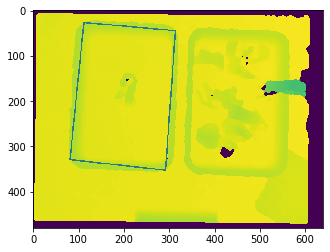

In [136]:
im_contours = im_gray.copy()
im_contours=cv2.drawContours(im_contours, [polyContour], 0, 100, 2)
plt.imshow(im_contours)

In [139]:
mask = (im == 0).astype(np.uint8)

In [143]:
im_gray = ((im - im.min()) / (im.max() - im.min()) * 255).astype('uint8')
depth_crop = cv2.inpaint(im_gray, mask, 1, cv2.INPAINT_NS)

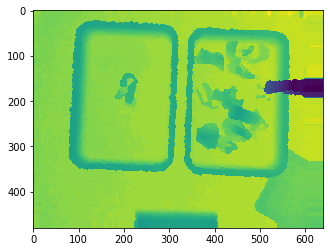

In [144]:
plt.imshow(depth_crop)

In [154]:
hull= np.squeeze(hull)

In [184]:
offset = 25
max_x, max_y = hull.max(axis=0) - offset
min_x, min_y = hull.min(axis=0) + offset*2
image_crop = im[min_y:max_y, min_x:max_x]

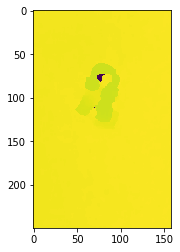

In [185]:
plt.imshow(image_crop)

In [186]:
mask = (image_crop == 0).astype(np.uint8)
depth_scale = np.abs(image_crop).max()
image_crop = image_crop.astype(np.float32) / depth_scale
image_crop = cv2.inpaint(image_crop, mask, 1, cv2.INPAINT_NS)
image_crop = image_crop * depth_scale

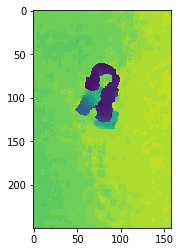

In [187]:
plt.imshow(image_crop)

In [243]:
image_crop = out_image
out_size=(300, 300)
border_x = int(max(np.ceil((out_size[0] - image_crop.shape[1]) / 2), 0))
border_y = int(max(np.ceil((out_size[1] - image_crop.shape[0]) / 2), 0))
out_image = cv2.copyMakeBorder(image_crop, border_y, border_y, border_x, border_x, cv2.BORDER_REPLICATE)
crop_x = (out_image.shape[1] - out_size[0])//2
crop_y = (out_image.shape[0] - out_size[1])//2
out_image = out_image[int(crop_y):int(crop_y+out_size[1]),
                      int(crop_x):int(crop_x+out_size[0])]

In [244]:
image_crop.shape

(301, 301)

In [245]:
out_image.shape

(300, 300)

In [275]:
plt.imshow(out_image)

UsageError: Cell magic `%%` not found.


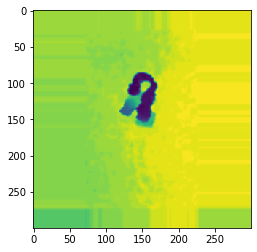

In [217]:
immm = cv2.GaussianBlur(out_image, (5,5), out_image.mean())
plt.imshow(immm)

In [272]:
im_gray = ((out_image - out_image.min()) / (out_image.max() - out_image.min()) * 255).astype('uint8')
thresh=0.3
t = thresh * 255 / (np.max(im) - np.min(im))
im_canny = cv2.Canny(im_gray, t, t*2.5)

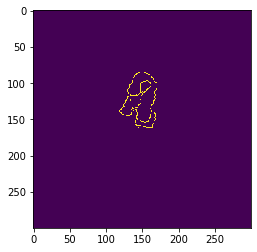

In [273]:
plt.imshow(im_canny)

In [295]:
def get_bin(image, thresh=0.03, position='LEFT'):
        """ 得到待抓取框的大概位置 """
        im = image
        im_gray = ((im - im.min()) / (im.max() - im.min()) * 255).astype('uint8')
        im_gray = cv2.medianBlur(im_gray, 7)
        t = thresh * 255 / (np.max(im) - np.min(im))
        im_canny = cv2.Canny(im_gray, t, t*2.5)
        contours, hierarchy = cv2.findContours(im_canny, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
        # 面积小于图像面积一般且x轴最大值小于400的轮廓中面积最大一个
        area = np.array([cv2.contourArea(c) for c in contours])
        max_x = np.array([c.max(axis=0)[0, 0] for c in contours])
        position_fiter = (max_x > 400) if position == 'LEFT' else (max_x < 400)
        area = np.where((area > 640*480/2) | (position_fiter), 0, area)
        area_sort = np.argsort(area)[::-1]
        maxa = area_sort[0]
        polyContour = cv2.approxPolyDP(contours[maxa], 20, closed=True)
        hull = cv2.convexHull(polyContour, False)
        return polyContour, np.squeeze(hull)

In [298]:
def _process(image, offset=25, out_size=(300, 300)):
        # 1.得到bin的大概位置, 并裁剪bin内的图像
        polyContour, hull = get_bin(image)
        max_x, max_y = hull.max(axis=0) - offset
        min_x, min_y = hull.min(axis=0) + offset * 2
        image_crop = image[min_y:max_y, min_x:max_x]
#         plt.imshow(image_crop)
        # 2.修复图像,填补空洞
        mask = (image_crop == 0).astype(np.uint8)
        depth_scale = np.abs(image_crop).max()
        image_crop = image_crop.astype(np.float32) / depth_scale
        image_crop = cv2.inpaint(image_crop, mask, 1, cv2.INPAINT_NS)
        image_crop = image_crop * depth_scale
        # 3.在边上插值使图像恢复到300*300
        border_x = int(max(np.ceil((out_size[0] - image_crop.shape[1]) / 2), 0))
        border_y = int(max(np.ceil((out_size[1] - image_crop.shape[0]) / 2), 0))
        out_image = cv2.copyMakeBorder(image_crop, border_y, border_y,
                                       border_x, border_x, cv2.BORDER_REPLICATE)
        crop_x = (out_image.shape[1] - out_size[0])//2
        crop_y = (out_image.shape[0] - out_size[1])//2
        out_image = out_image[int(crop_y):int(crop_y+out_size[1]),
                              int(crop_x):int(crop_x+out_size[0])]
        # TODO: 需要还原到原始图像位置
        x_0 = -min_x+border_x-crop_x
        y_0 = -min_y+border_y-crop_y
        return out_image, np.array([x_0, y_0])

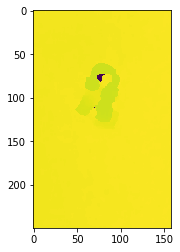

In [297]:
_process(im)

In [299]:
out_im, ar = _process(im)

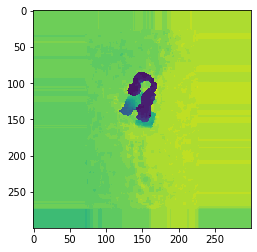

In [300]:
plt.imshow(out_im)

In [303]:
np.save('image300',out_im)

In [301]:
ar

array([-60, -52])

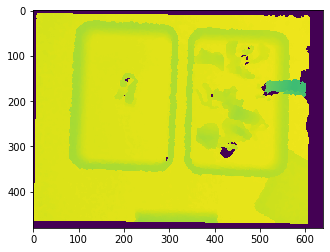

In [302]:
plt.imshow(im)